### Preparing the R environment

Install the required packages to be used inside the project.

In [23]:
########################################################
###### Suppressing warnings for a cleaner output #######
########################################################
options(warn=-1)

########################################################
#### Installing and importing the required packages ####
########################################################
library(lubridate)                 # library to help work with dates
install.packages("scales")         # Scale Functions for Visualization
library(scales)

install.packages("tidyverse")      # Collection of packages to model, transform, and visualize data
library(tidyverse)                 # for declaratively creating graphics
library(dplyr)

library(ggpubr)

library(tidymodels)
library(gridExtra)
install.packages("geobr")
library(geobr)
library(sf)

# install.packages("cowplot")
# library(cowplot)                   # Arrange 2 plots side-by-side https://stackoverflow.com/a/31223588/9332260

In [24]:
# Setting up the environment

options(repr.plot.width = 14, repr.plot.height = 6)


theme <-
  theme_minimal() +
  theme(
    plot.title = element_text(size=18, face="bold", color="gray30"),
    plot.subtitle = element_text(size=15, face="bold", color="gray30"),
    axis.title = element_text(size=15, face="bold", color="gray30"),
    plot.caption = element_text(size=15, face="bold", color = "gray60"),
    legend.text = element_text(size=13, color="gray30"),
    legend.title = element_text(size=13, color="gray30"),
    strip.text.x = element_text(size=13, face="bold", color="gray30")
  )

theme_set(theme)

# Exploratory Data Analysis: COVID-19

In this Jupyter notebook, we perform a self expertimentation of Exploratory Data Analysis (EDA) for Denmark's COVID-19 cases in R. R is a language and environment for statistical computing and graphics (**cite: https://www.r-project.org/about.html**) which is perfect in this project as the goal is to visualize data and tell a conclusion/story based on real decisions.

In [25]:
dates <- c("02/27/92")
as.Date(dates, "%m/%d/%y")

[1] "1992-02-27"

In [26]:
dates <- c("M02D27")
as.Date(dates, "M%mD%d")

[1] "2020-02-27"

## 1. Identify business problem

The first step to Exploratory Data Analysis (EDA) is to identify the business problem. The business case revolves around the understanding of the situation and the use of data to prevent spread of COVID-19 virus in Denmark. The aim is to analyze the data and compare against the decisions made and enforced by the officials and the health experts, primarily the two lockdowns from March and Decemberof 2020. This EDA is not a solution to the problem but the ambition is to understand if gathering factual data aided in effective decision making by the authorities. 

## 2. Data collection

The data used in this analysis is collected from Statistibanken, which is a public database maintained and made available by Danmarks Statistik --- the central statistics office in Denmark under the Ministry of Economy. The data consists of official records of total people tested, infections, deaths and admission to hospital to among other key figures. The data was collected starting from March 21, 2020, which gets updated frequently. The latest data as of conducting the experiment is up until December 15, 2020.

## 3. Data preparation

The data from Statistikbanken is made available in multiple formats so people can choose how they want the data, for example: an Excel sheet or a plain text file. For this analaysis, we chose to use the data as a CSV (comma-separated value) file for ease of use. In the following steps, we will go through the process of loading the data, tidying it and preparing it for the analysis.

### 3.1 Load the data into R and inspect

In the following steps, we load the raw data into this R notebook and inspect if it is workable and understandable. If not, we must proceed to transform the data. Without a clear understanding of data, the anaylsis will be out of scope.

After we load the data into the R notebook, we examine to ensure the target data and/or key figures exists. 

In [27]:
list.files(".")

[1] "covid-data-modified.csv"        "covid-data-statistikbanken.csv"
[3] "EDA-COVID-Copy1.ipynb"          "EDA-COVID.ipynb"               
[5] "README.md"                      "Untitled.ipynb"

In [28]:
# Create a dataframe by reading the file containing the dataset

raw_data <- read.csv("covid-data-statistikbanken.csv", encoding="UTF-8")

### 3.2 Initial inspection and feedback

Now that the target data is loaded and ready to be used, we inspect and conclude which transformations are needed. To do so, we print the first few rows of the data.

In [29]:
tail(raw_data)

X.,M03D21,M03D22,M03D23,M03D24,M03D25,M03D26,M03D27,M03D28,M03D29,...,M12D06,M12D07,M12D08,M12D09,M12D10,M12D11,M12D12,M12D13,M12D14,M12D15
Confirmed cases of COVID-19 (total),1326,1395,1450,1577,1715,1851,2010,2201,2395,...,90603,92649,94799,97357,100489,103564,107116,109758,113095,116087
Recovered from COVID-19 infection (total,..,..,..,..,..,..,..,..,..,...,70876,71882,73052,74367,75664,76927,78236,79394,80564,82099
Number of persons tested for COVID-19 (total),11657,12351,12843,13756,14870,15981,17275,18810,20198,...,3524861,3541148,3556264,3572954,3592677,3611456,3630815,3646152,3664247,3680607
Deaths with COVID-19 (total),22,25,31,37,43,55,67,76,84,...,899,905,912,922,928,935,943,954,961,961
Deaths with COVID-19 per day,3,3,6,6,6,12,12,9,8,...,8,6,7,10,6,7,8,11,7,0
Persons hospitalised in connection with COVID-19,206,232,254,301,350,386,430,459,499,...,302,328,354,349,342,361,371,390,429,439


In [30]:
# Transposing a dataframe: https://stackoverflow.com/a/6645587/9332260
denmark_covid_data <- t(raw_data[,2:ncol(raw_data)])
colnames(denmark_covid_data) <- raw_data[,1] 
head(denmark_covid_data)


,Confirmed cases of COVID-19 (total),Recovered from COVID-19 infection (total,Number of persons tested for COVID-19 (total),Deaths with COVID-19 (total),Deaths with COVID-19 per day,Persons hospitalised in connection with COVID-19,Patients in intensive care units in connection with COVID-19,Patients on ventilators in connection with COVID-19
M03D21,1326,..,11657,22,3,206,42,35
M03D22,1395,..,12351,25,3,232,46,40
M03D23,1450,..,12843,31,6,254,55,47
M03D24,1577,..,13756,37,6,301,59,58
M03D25,1715,..,14870,43,6,350,87,76
M03D26,1851,..,15981,55,12,386,94,78


In [31]:
str(denmark_covid_data)


 chr [1:270, 1:8] "1326" "1395" "1450" "1577" "1715" "1851" "2010" "2201" ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:270] "M03D21" "M03D22" "M03D23" "M03D24" ...
  ..$ : chr [1:8] "Confirmed cases of COVID-19 (total)" "Recovered from COVID-19 infection (total" "Number of persons tested for COVID-19 (total)" "Deaths with COVID-19 (total)" ...


In [32]:
# Printing column names
colnames(denmark_covid_data)

[1] "Confirmed cases of COVID-19 (total)"                         
[2] "Recovered from COVID-19 infection (total"                    
[3] "Number of persons tested for COVID-19 (total)"               
[4] "Deaths with COVID-19 (total)"                                
[5] "Deaths with COVID-19 per day"                                
[6] "Persons hospitalised in connection with COVID-19"            
[7] "Patients in intensive care units in connection with COVID-19"
[8] "Patients on ventilators in connection with COVID-19"

In [33]:
# Rename columns: https://stackoverflow.com/a/16031013/9332260
denmark_covid_data <- cbind(rownames(denmark_covid_data), denmark_covid_data)
rownames(denmark_covid_data) <- NULL
colnames(denmark_covid_data) <- c("original_date", "total_cases", "total_recovered", "total_tested", "total_deaths", "daily_deaths", "daily_hospitalized", "daily_patients_icu", "daily_patients_ventilators")


In [34]:
denmark_covid_data <- as.data.frame(denmark_covid_data)

In [35]:
head(denmark_covid_data)

original_date,total_cases,total_recovered,total_tested,total_deaths,daily_deaths,daily_hospitalized,daily_patients_icu,daily_patients_ventilators
M03D21,1326,..,11657,22,3,206,42,35
M03D22,1395,..,12351,25,3,232,46,40
M03D23,1450,..,12843,31,6,254,55,47
M03D24,1577,..,13756,37,6,301,59,58
M03D25,1715,..,14870,43,6,350,87,76
M03D26,1851,..,15981,55,12,386,94,78


In [36]:
denmark_covid_data$total_tested

[1] 11657   12351   12843   13756   14870   15981   17275   18810   20198  
 [10] 21378   23763   26776   29921   34388   39928   43734   46916   51544  
 [19] 57535   62210   64731   67771   70125   72099   73919   77712   82380  
 [28] 87024   91437   94277   96244   100543  108465  116621  125329  136738 
 [37] 146915  155810  166846  180062  193165  206576  221912  233799  244791 
 [46] 257738  270680  284480  298488  308984  317834  326560  334260  345712 
 [55] 357986  368889  379482  388703  394394  402194  412051  425101  433971 
 [64] 442650  451450  458305  467009  480239  484482  504543  514467  522594 
 [73] 528982  534782  542895  552888  562905  571832  579400  585024  594790 
 [82] 602118  609672  627155  637701  648326  656418  664603  677270  691419 
 [91] 704269  ..      ..      738916  749603  765002  780330  793499  ..     
[100] ..      822264  831196  843483  855637  868185  ..      ..      894073 
[109] 902129  913373  924644  935053  ..      ..      960821  968455  981280 
[118] 991101  1001512 ..      ..      1019131 1032598 1044211 1057333 1070653
[127] ..      ..      1098535 1107638 1120675 1134433 1147765 ..      ..     
[136] 1182260 1193168 1207838 1223486 1239335 ..      ..      1286375 1301236
[145] 1316041 1335826 1357855 1379014 1400577 1417864 1434458 1455017 1482614
[154] 1500384 1525761 1546974 1565709 1584789 1606317 1629993 1653439 1676300
[163] 1696971 1713288 1730572 1748934 1771570 1793415 1817503 1835618 1854671
[172] 1872805 1893679 1918785 1944062 1970742 1998433 2022130 2046537 ..     
[181] 2102027 2128433 2154866 2178466 2197714 2220218 2246853 2270273 2295055
[190] 2317214 2336926 2357180 2375249 2397485 2417358 2438448 2454144 2469134
[199] 2483456 2497905 2514182 2533756 2553614 2569929 2582140 2594769 2604640
[208] 2618613 2629653 2640504 2652317 2662072 2671105 2682655 2696750 2709615
[217] 2723093 2737622 2755424 2774222 2789321 2809894 2824701 2846245 2866530
[226] 2884136 2901124 2923556 2939383 2957171 2981224 2998259 3016589 3032754
[235] 3057241 3080721 3102008 3121095 3141907 3161349 3181467 3199098 3220265
[244] 3239806 3258149 3275193 3289511 3308512 3329222 3346932 3364827 3383120
[253] 3404692 3418006 3432519 3448151 3464269 3478986 3493655 3510327 3524861
[262] 3541148 3556264 3572954 3592677 3611456 3630815 3646152 3664247 3680607
254 Levels: .. 1001512 100543 1019131 1032598 1044211 1057333 1070653 ... 991101

In [37]:
denmark_covid_data <- denmark_covid_data %>%
  mutate(
      date = as.Date(original_date, "M%mD%d"),
      day = row_number(date) - 1,
      total_recovered = na_if(total_recovered, ".."),
      total_tested = na_if(total_tested, ".."),
      daily_hospitalized = na_if(daily_hospitalized, ".."),
      daily_patients_icu = na_if(daily_patients_icu, ".."),
      daily_patients_ventilators = na_if(daily_patients_ventilators, ".."),
  )

In [38]:
head(denmark_covid_data)

original_date,total_cases,total_recovered,total_tested,total_deaths,daily_deaths,daily_hospitalized,daily_patients_icu,daily_patients_ventilators,date,day
M03D21,1326,NA,11657,22,3,206,42,35,2020-03-21,0
M03D22,1395,NA,12351,25,3,232,46,40,2020-03-22,1
M03D23,1450,NA,12843,31,6,254,55,47,2020-03-23,2
M03D24,1577,NA,13756,37,6,301,59,58,2020-03-24,3
M03D25,1715,NA,14870,43,6,350,87,76,2020-03-25,4
M03D26,1851,NA,15981,55,12,386,94,78,2020-03-26,5


In [39]:
denmark_covid_data$total_tested

[1] 11657   12351   12843   13756   14870   15981   17275   18810   20198  
 [10] 21378   23763   26776   29921   34388   39928   43734   46916   51544  
 [19] 57535   62210   64731   67771   70125   72099   73919   77712   82380  
 [28] 87024   91437   94277   96244   100543  108465  116621  125329  136738 
 [37] 146915  155810  166846  180062  193165  206576  221912  233799  244791 
 [46] 257738  270680  284480  298488  308984  317834  326560  334260  345712 
 [55] 357986  368889  379482  388703  394394  402194  412051  425101  433971 
 [64] 442650  451450  458305  467009  480239  484482  504543  514467  522594 
 [73] 528982  534782  542895  552888  562905  571832  579400  585024  594790 
 [82] 602118  609672  627155  637701  648326  656418  664603  677270  691419 
 [91] 704269  <NA>    <NA>    738916  749603  765002  780330  793499  <NA>   
[100] <NA>    822264  831196  843483  855637  868185  <NA>    <NA>    894073 
[109] 902129  913373  924644  935053  <NA>    <NA>    960821  968455  981280 
[118] 991101  1001512 <NA>    <NA>    1019131 1032598 1044211 1057333 1070653
[127] <NA>    <NA>    1098535 1107638 1120675 1134433 1147765 <NA>    <NA>   
[136] 1182260 1193168 1207838 1223486 1239335 <NA>    <NA>    1286375 1301236
[145] 1316041 1335826 1357855 1379014 1400577 1417864 1434458 1455017 1482614
[154] 1500384 1525761 1546974 1565709 1584789 1606317 1629993 1653439 1676300
[163] 1696971 1713288 1730572 1748934 1771570 1793415 1817503 1835618 1854671
[172] 1872805 1893679 1918785 1944062 1970742 1998433 2022130 2046537 <NA>   
[181] 2102027 2128433 2154866 2178466 2197714 2220218 2246853 2270273 2295055
[190] 2317214 2336926 2357180 2375249 2397485 2417358 2438448 2454144 2469134
[199] 2483456 2497905 2514182 2533756 2553614 2569929 2582140 2594769 2604640
[208] 2618613 2629653 2640504 2652317 2662072 2671105 2682655 2696750 2709615
[217] 2723093 2737622 2755424 2774222 2789321 2809894 2824701 2846245 2866530
[226] 2884136 2901124 2923556 2939383 2957171 2981224 2998259 3016589 3032754
[235] 3057241 3080721 3102008 3121095 3141907 3161349 3181467 3199098 3220265
[244] 3239806 3258149 3275193 3289511 3308512 3329222 3346932 3364827 3383120
[253] 3404692 3418006 3432519 3448151 3464269 3478986 3493655 3510327 3524861
[262] 3541148 3556264 3572954 3592677 3611456 3630815 3646152 3664247 3680607
254 Levels: .. 1001512 100543 1019131 1032598 1044211 1057333 1070653 ... 991101

In [40]:
str(denmark_covid_data)


'data.frame':	270 obs. of  11 variables:
 $ original_date             : Factor w/ 270 levels "M03D21","M03D22",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ total_cases               : Factor w/ 254 levels "  13173","  13262",..: 243 244 245 246 247 248 249 250 251 252 ...
 $ total_recovered           : Factor w/ 242 levels "  12209","  12251",..: NA NA NA NA NA NA NA NA NA NA ...
 $ total_tested              : Factor w/ 254 levels "..","1001512",..: 15 21 24 31 39 46 54 64 71 77 ...
 $ total_deaths              : Factor w/ 201 levels "    611","    613",..: 181 182 183 184 185 186 198 199 200 201 ...
 $ daily_deaths              : Factor w/ 48 levels "      0","      1",..: 45 45 46 46 46 41 41 48 47 40 ...
 $ daily_hospitalized        : Factor w/ 197 levels "     12","     13",..: 186 187 188 189 190 191 192 193 194 196 ...
 $ daily_patients_icu        : Factor w/ 109 levels "      0","      1",..: 104 105 106 107 108 109 98 99 100 101 ...
 $ daily_patients_ventilators: Factor w/ 93 levels "      

In [41]:
denmark_covid_data$total_cases <- as.numeric(as.character(denmark_covid_data$total_cases))
denmark_covid_data$total_recovered <- as.numeric(as.character(denmark_covid_data$total_recovered))
denmark_covid_data$total_tested <- as.numeric(as.character(denmark_covid_data$total_tested))
denmark_covid_data$total_deaths <- as.numeric(as.character(denmark_covid_data$total_deaths))
denmark_covid_data$daily_deaths <- as.numeric(as.character(denmark_covid_data$daily_deaths))
denmark_covid_data$daily_hospitalized <- as.numeric(as.character(denmark_covid_data$daily_hospitalized))
denmark_covid_data$daily_patients_icu <- as.numeric(as.character(denmark_covid_data$daily_patients_icu))
denmark_covid_data$daily_patients_ventilators <- as.numeric(as.character(denmark_covid_data$daily_patients_ventilators))

In [42]:
head(denmark_covid_data)

original_date,total_cases,total_recovered,total_tested,total_deaths,daily_deaths,daily_hospitalized,daily_patients_icu,daily_patients_ventilators,date,day
M03D21,1326,NA,11657,22,3,206,42,35,2020-03-21,0
M03D22,1395,NA,12351,25,3,232,46,40,2020-03-22,1
M03D23,1450,NA,12843,31,6,254,55,47,2020-03-23,2
M03D24,1577,NA,13756,37,6,301,59,58,2020-03-24,3
M03D25,1715,NA,14870,43,6,350,87,76,2020-03-25,4
M03D26,1851,NA,15981,55,12,386,94,78,2020-03-26,5


In [43]:
denmark_covid_data <- 
denmark_covid_data %>%
  arrange(date) %>%
   mutate(
       new_cases = total_cases - lag(total_cases, 1, 0),
   ) %>% arrange(date)

In [44]:
denmark_covid_data$new_cases[1]=71
denmark_covid_data

original_date,total_cases,total_recovered,total_tested,total_deaths,daily_deaths,daily_hospitalized,daily_patients_icu,daily_patients_ventilators,date,day,new_cases
M03D21,1326,NA,11657,22,3,206,42,35,2020-03-21,0,71
M03D22,1395,NA,12351,25,3,232,46,40,2020-03-22,1,69
M03D23,1450,NA,12843,31,6,254,55,47,2020-03-23,2,55
M03D24,1577,NA,13756,37,6,301,59,58,2020-03-24,3,127
M03D25,1715,NA,14870,43,6,350,87,76,2020-03-25,4,138
M03D26,1851,NA,15981,55,12,386,94,78,2020-03-26,5,136
M03D27,2010,NA,17275,67,12,430,109,89,2020-03-27,6,159
M03D28,2201,NA,18810,76,9,459,121,104,2020-03-28,7,191
M03D29,2395,NA,20198,84,8,499,131,113,2020-03-29,8,194
M03D30,2555,NA,21378,95,11,533,137,119,2020-03-30,9,160


# Here!!!!!!!!!!!!!

In the initial inspection, the data looks to be well prepared and organized but still not ready to be used. Based on the requirements and researchers, the transformations required is subjective. For our use case, the required transformations are listed below:

- The key indicators, i.e the names describing the values, are the first cell in every row. It needs to be transposed (rotated) such that the key indicators are the first cell of every columns. In simple terms, the x-axis and y-axis needs to be reversed. 
- The timeline is denoted by the format `MxxDxx`. For flexibility and general understanding, the date needs to be transformed into the international ISO format `yyyy-mm-dd`.
- The missing values are represented by `..`. Those should updated to either empty values or `NA` so that R can interpret it as missing value.
- Some interesting key indicators are missing, such as the daily confirmed cases. To rectify this situation, we can simply subtract the total number of cases of a certain day minus the day before, throughout the timeline.
- Finally, to adhere to R's naming covention, we rename each of the key indicators to follow snake case using "_", for example `some_key_indicator`.

All of the above steps to transform the data was done in Google Sheets (Microsoft Excel alternative) with the power of mathematical functions called formulas.

## write some shit to explain we didn't have to collect data manually and thank statistikbanken.

In [21]:
list.files('.')

[1] "covid-data-modified.csv"        "covid-data-statistikbanken.csv"
[3] "EDA-COVID-Copy1.ipynb"          "EDA-COVID.ipynb"               
[5] "README.md"                      "Untitled.ipynb"

# Make note about the importance of verifying data

# Refactor 

### 3.3 Verify and update data types

The next step is to check the data types of the data loaded onto R. Since we read the data from a CSV file, R does not know what type of data certain inputs are. By default, it categorises unknown or mixed data types as `Factor` as they can store both strings and integers.

For example, the column (or variable) `date` should be of type `Date` but R understands it as of data type `Factor`. While this is fine and we can absolutely work with it, changing it to type of `Date` allows us to be more flexible and only show the month with the month's name, rather then the original value, such as `2020-04-20`.

In [45]:
str(denmark_covid_data)

'data.frame':	270 obs. of  12 variables:
 $ original_date             : Factor w/ 270 levels "M03D21","M03D22",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ total_cases               : num  1326 1395 1450 1577 1715 ...
 $ total_recovered           : num  NA NA NA NA NA NA NA NA NA NA ...
 $ total_tested              : num  11657 12351 12843 13756 14870 ...
 $ total_deaths              : num  22 25 31 37 43 55 67 76 84 95 ...
 $ daily_deaths              : num  3 3 6 6 6 12 12 9 8 11 ...
 $ daily_hospitalized        : num  206 232 254 301 350 386 430 459 499 533 ...
 $ daily_patients_icu        : num  42 46 55 59 87 94 109 121 131 137 ...
 $ daily_patients_ventilators: num  35 40 47 58 76 78 89 104 113 119 ...
 $ date                      : Date, format: "2020-03-21" "2020-03-22" ...
 $ day                       : num  0 1 2 3 4 5 6 7 8 9 ...
 $ new_cases                 : num  71 69 55 127 138 136 159 191 194 160 ...


## 4. Analyze the data

Now that we have changed the data types of the input data, we can start analyzing the data and gain understanding from it. To plot the data, we use the library `tidyverse` because of its flexibility and customization abilities.

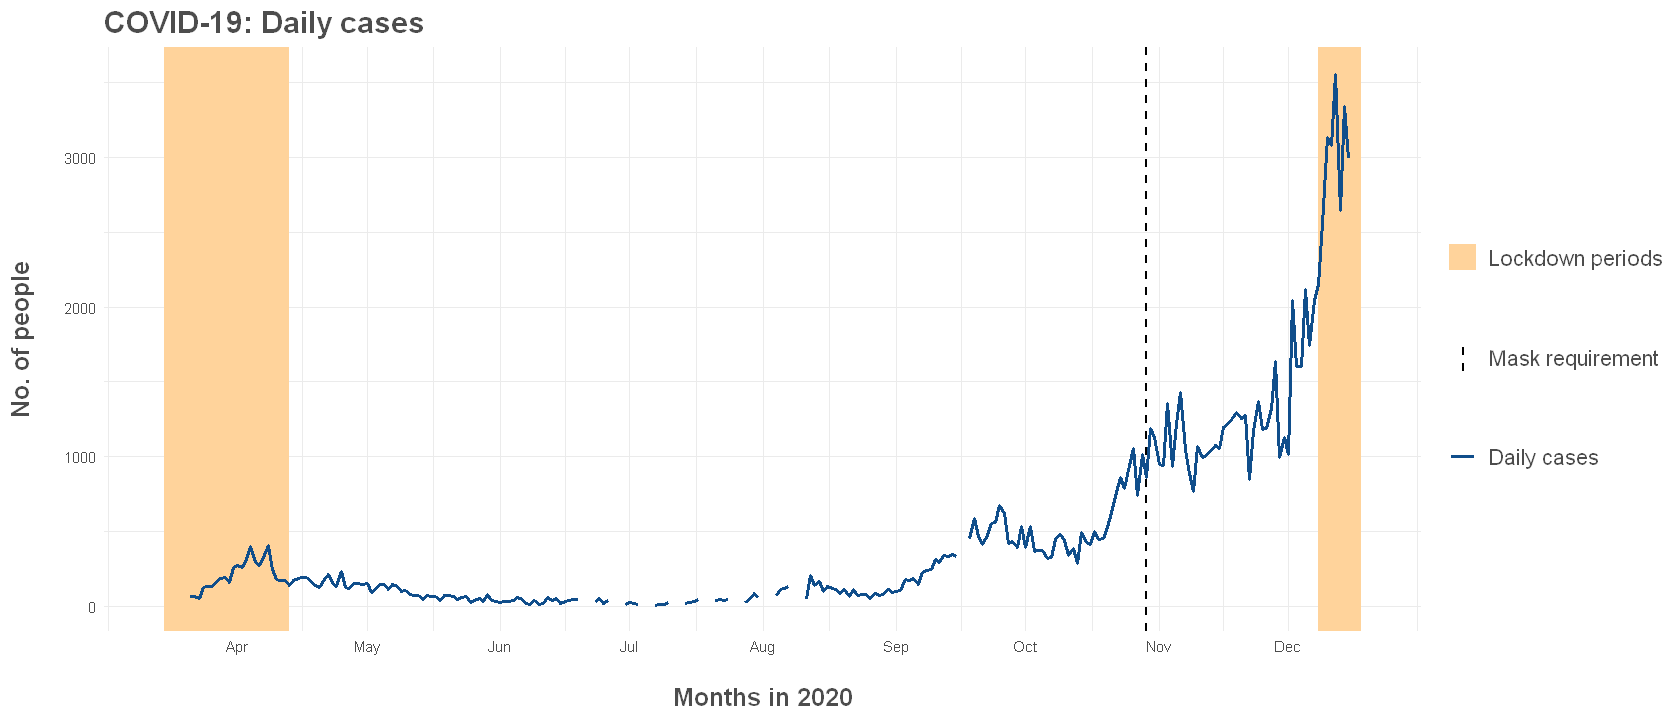

In [46]:
# Daily cases
# options(repr.plot.width=7, repr.plot.height=5)

ggplot(denmark_covid_data, aes(x = date)) +

geom_rect(aes(                                                             # Rectangular shade for emphasizing on lockdown #1
    xmin = as.Date("2020-03-15"),
    xmax = as.Date("2020-04-13"),
    ymin = -Inf, ymax = Inf, fill = "Lockdown period")) +
geom_rect(aes(                                                             # Rectangular shade for emphasizing on lockdown #2
    xmin = as.Date("2020-12-08"),
    xmax = as.Date("2020-12-18"),
    ymin = -Inf, ymax = Inf, fill = "Lockdown period")) +
geom_vline(aes(                                                            # Vertical dashed line
    xintercept = as.Date("2020-10-29"),
    linetype = "Break"),
           color = "black",
           lwd = 0.7
          ) +


geom_line(aes(y = new_cases, color = "dodgerblue4"), lwd=1) +
scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +       # Improving the x-axis to show all months

xlab("\nMonths in 2020") +                                                 # Label for x-axis
scale_y_continuous("No. of people\n") +                                    # Label for y-axis

ggtitle("COVID-19: Daily cases") +                          # Title for the plot
scale_fill_manual(name = "",                                               # Legend for the rectangular shade
                  values="burlywood1",
                  labels=c("Lockdown periods")) +
scale_color_identity(name = "",                                            # Legend for the line plots
                     breaks = c("dodgerblue4"),
                     labels = c("Daily cases"),
                     guide = "legend") +
scale_linetype_manual(name = "",                                           # Legend for the vertical dotted line
                      values = c("Break" = "dashed"),
                      labels = c("Mask requirement"))

### 4.1 Deaths, hospitalized and lockdowns

Starting with one of the most impactful plotting, we analyze the data for the number of deaths and hospitalized. Along with that, we also emphasize on the 2 lockdowns enforced by the state officials, the first one from March 15, 2020 to April 13, 2020 and the recent one starting from December 9, 2020 onwards.

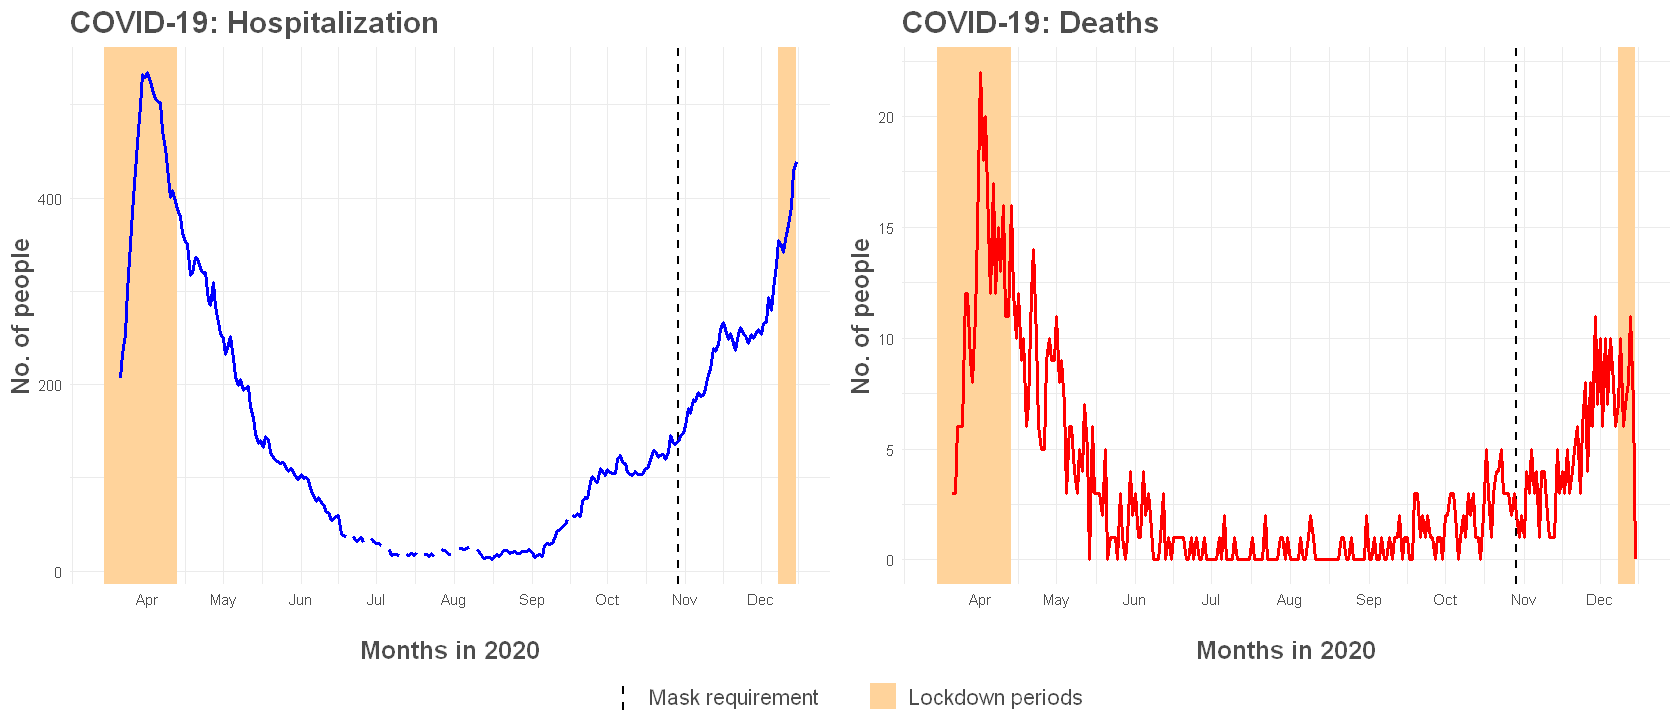

In [47]:
# options(repr.plot.width=7, repr.plot.height=4.5)

hospitalized_plot <- ggplot(denmark_covid_data, aes(x = date)) +                                # Specify the data frame and x-axis for the plot
geom_rect(aes(                                                             # Rectangular shade for emphasizing on lockdown #1
    xmin = as.Date("2020-03-15"),
    xmax = as.Date("2020-04-13"),
    ymin = -Inf, ymax = Inf, fill = "Lockdown period")) +
geom_rect(aes(                                                             # Rectangular shade for emphasizing on lockdown #2
    xmin = as.Date("2020-12-08"),
    xmax = as.Date("2020-12-15"),
    ymin = -Inf, ymax = Inf, fill = "Lockdown period")) +

geom_vline(aes(                                                            # Vertical dashed line
    xintercept = as.Date("2020-10-29"),
    linetype = "Break"),
           color = "black",
           lwd = 0.7
          ) +

geom_line(aes(y = daily_hospitalized, color = "blue"), lwd = 1) +               # line plot for hospitalized

scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +       # Improving the x-axis to show all months

xlab("\nMonths in 2020") +                                                 # Label for x-axis
scale_y_continuous("No. of people") +                                    # Label for y-axis

ggtitle("COVID-19: Hospitalization") +                          # Title for the plot
scale_fill_manual(name = "",                                               # Legend for the rectangular shade
                  values="burlywood1",
                  labels=c("Lockdown periods")) +
scale_color_identity(name = "",                                            # Legend for the line plots
                     breaks = c("blue", "red"),
                     labels = c("Hospitalized", "Deaths"),
                     ) +
scale_linetype_manual(name = "",                                           # Legend for the vertical dotted line
                      values = c("Break" = "dashed"),
                      labels = c("Mask requirement")) 
# multiple_grid_plot_theme_config
# theme(legend.position = c(1, 1), legend.justification = c(1, 1))

deaths_plot <- ggplot(denmark_covid_data, aes(x = date)) +                                # Specify the data frame and x-axis for the plot
geom_rect(aes(                                                             # Rectangular shade for emphasizing on lockdown #1
    xmin = as.Date("2020-03-15"),
    xmax = as.Date("2020-04-13"),
    ymin = -Inf, ymax = Inf, fill = "Lockdown period")) +
geom_rect(aes(                                                             # Rectangular shade for emphasizing on lockdown #2
    xmin = as.Date("2020-12-08"),
    xmax = as.Date("2020-12-15"),
    ymin = -Inf, ymax = Inf, fill = "Lockdown period")) +

geom_vline(aes(                                                            # Vertical dashed line
    xintercept = as.Date("2020-10-29"),
    linetype = "Break"),
           color = "black",
           lwd = 0.7
          ) +

geom_line(aes(y = daily_deaths, color = "red"), lwd = 1) +                 # Line plot for deaths
# geom_line(aes(y = daily_hospitalized, color = "blue"), lwd = 1) +               # line plot for hospitalized

scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +       # Improving the x-axis to show all months

xlab("\nMonths in 2020") +                                                 # Label for x-axis
scale_y_continuous("No. of people") +                                    # Label for y-axis

ggtitle("COVID-19: Deaths") +                          # Title for the plot
scale_fill_manual(name = "",                                               # Legend for the rectangular shade
                  values="burlywood1",
                  labels=c("Lockdown periods")) +
scale_color_identity(name = "",                                            # Legend for the line plots
                     breaks = c("red"),
                     labels = c("Deaths")
                     ) +
scale_linetype_manual(name = "",                                           # Legend for the vertical dotted line
                      values = c("Break" = "dashed"),
                      labels = c("Mask requirement"))
# multiple_grid_plot_theme_config

ggarrange(hospitalized_plot, deaths_plot, ncol=2, common.legend = TRUE, legend="bottom") 


After the initial plotting, it is clear that there was a strong impact of COVID-19 around late March--early April. The number of people who were dying due to COVID-19, as indicated by red line, and who were hospitalized, as indicated by the blue line, increased sharply. The first, month-long lockdown was imposed during this period, as indicated by the soft-orange shade. The result of the lockdown was effective as the number of reported hospitalization started to decline and kept declining over the next few months. The number of deaths was still rising at the end of the first lockdown, but started to stabilize soon after.

This was a positive indication that the imposed lockdown was effective in controlling the spread of the virus.

As the restictions started to loosen up, the public started to gather in larger numbers, which was an opportunity for the virus to spread again. This is indicated by the rise on both total deaths and hospitalized starting September. To control the rapid increase, the government mandated the use of mask on all public places starting October 29, represented by the black, dashed line.

Ever since, the numbers started to grow. The plot above shows a sharp incline starting November. And with the holidays starting, the government imposed second lockdown starting December 09, 2020, which is the date of conducting this experiment. This was an attempt to reduce the number of gatherings and parties, and limit them to families to control the spread of the COVID-19.

### 4.2 Total confirmed cased and total tested

While the first plot was impactful, a more meaningful one would be to analyze the data between total number of people tested (plot A) and total number of confirmed cases (plot B). When visualising them individually, both of the plots A and B shows almost linear growth as the months go by. Without much context, this is very worrying and can be taken out of proportion. By when combining them and visualizing them on the same plot (plot C), it becomes much clearer that the situation is not as bad. Yes, the number of cases are increasing, but when comparing them to the number of tests done, the result has a vastly different conclusion.

This is an example for understanding the importance of scope and context while conducting an analysis.

In [48]:
str(denmark_covid_data)

'data.frame':	270 obs. of  12 variables:
 $ original_date             : Factor w/ 270 levels "M03D21","M03D22",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ total_cases               : num  1326 1395 1450 1577 1715 ...
 $ total_recovered           : num  NA NA NA NA NA NA NA NA NA NA ...
 $ total_tested              : num  11657 12351 12843 13756 14870 ...
 $ total_deaths              : num  22 25 31 37 43 55 67 76 84 95 ...
 $ daily_deaths              : num  3 3 6 6 6 12 12 9 8 11 ...
 $ daily_hospitalized        : num  206 232 254 301 350 386 430 459 499 533 ...
 $ daily_patients_icu        : num  42 46 55 59 87 94 109 121 131 137 ...
 $ daily_patients_ventilators: num  35 40 47 58 76 78 89 104 113 119 ...
 $ date                      : Date, format: "2020-03-21" "2020-03-22" ...
 $ day                       : num  0 1 2 3 4 5 6 7 8 9 ...
 $ new_cases                 : num  71 69 55 127 138 136 159 191 194 160 ...


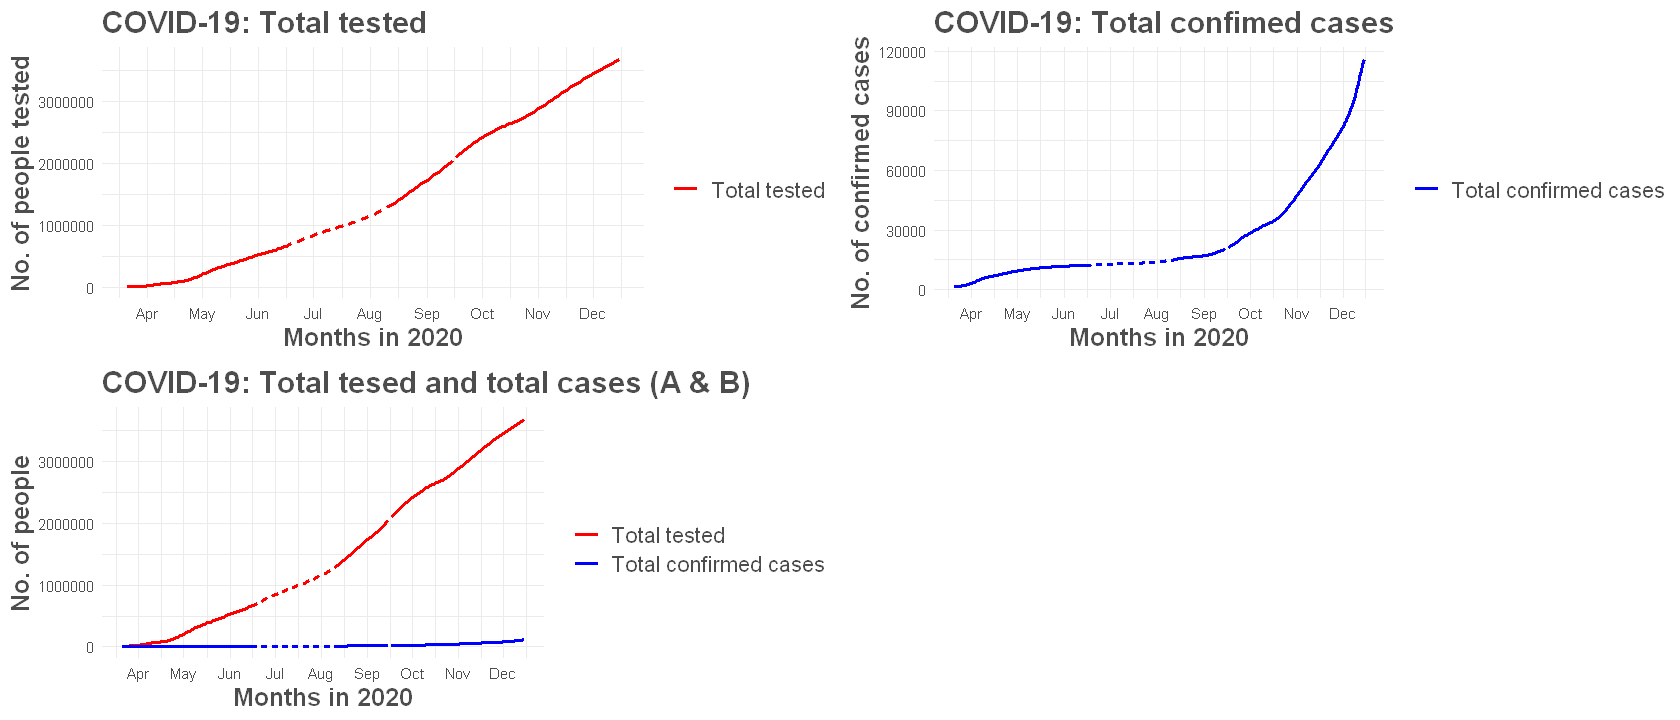

In [49]:
##########################################################################################################################
############ Step 1: First we create a plot "A" for total number of people tested and assign it to a variable ############
##########################################################################################################################

total_tested_plot <- ggplot(denmark_covid_data, aes(x = date)) +        # Specify the data frame and x-axis for the plot
geom_line(aes(y = total_tested, color = "red"), lwd = 1) +               # Line plot for total number of peple tested
scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +    # Improving the x-axis to show all months
xlab("Months in 2020") +                                                # Label for x-axis
scale_y_continuous("No. of people tested",                              # Label for y-axis
                   labels = function(x) format(x, scientific = FALSE)   # Change from exponentials to human readable numbers
                   ) +
ggtitle("COVID-19: Total tested") +                                     # Title for the plot A
scale_color_identity(name = "",                                         # Legend for the line plot
                     breaks = "red",
                     labels = "Total tested",
                     guide = "legend"
                     )
# multiple_grid_plot_theme_config


##########################################################################################################################
############Step 2: Then we create a plot "B" for total number of confirmed cases and assign it to a variable ###########
##########################################################################################################################

total_confirmed_cases_plot <- ggplot(denmark_covid_data, aes(x = date)) +   # Specify the data frame and x-axis for the plot
geom_line(aes(y = total_cases, color = "blue"), lwd = 1) +                  # Line plot for total confirmed cases
scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +        # Improving the x-axis to show all months
xlab("Months in 2020") +                                                    # Label for x-axis
scale_y_continuous("No. of confirmed cases",                                # Label for y-axis
                   labels = function(x) format(x, scientific = FALSE)
                   ) +
ggtitle("COVID-19: Total confimed cases") +                                 # Title for the plot
scale_color_identity(name = "",                                             # Legend for the line plot
                     breaks = "blue",
                     labels = "Total confirmed cases",
                     guide = "legend"
                     )
# multiple_grid_plot_theme_config


##########################################################################################################################
##################### Step 3: Then we create a combined plot for "A" & "B" and assign it to a variable ###################
##########################################################################################################################

combined_plot <- ggplot(denmark_covid_data, aes(x = date)) +             # Specify the data frame and x-axis for the plot
geom_line(aes(y = total_tested, color = "red"), lwd = 1) +                # Line plot for total number of peple tested
geom_line(aes(y = total_cases, color = "blue"), lwd = 1) +               # Line plot for total confirmed cases
scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +     # Improving the x-axis to show all months
xlab("Months in 2020") +                                                 # Label for x-axis
scale_y_continuous("No. of people",                                      # Label for y-axis
                   labels = function(x) format(x, scientific = FALSE)
                   ) +
ggtitle("COVID-19: Total tesed and total cases (A & B)") +               # Title for the plot
scale_color_identity(name = "",                                          # Legend for the line plot
                     breaks = c("red", "blue"),
                     labels = c("Total tested", "Total confirmed cases"),
                     guide = "legend")
# multiple_grid_plot_theme_config



##########################################################################################################################
####################################### Step 4: Finally make a grid of all 3 plots ######################################
##########################################################################################################################
# options(repr.plot.width=7, repr.plot.height=7)

ggarrange(total_tested_plot, total_confirmed_cases_plot, combined_plot)


-----

-----

# Ploynomial regression

[Source to this shit](https://www.kaggle.com/pedrohenriquecardoso/analyzing-and-predicting-covid-19-updated-05-20)

## Training the model

In [50]:
set.seed(2020)
# The set.seed() function sets the starting number used to generate a sequence of random numbers – it ensures that you get the same result if you start with that same seed each time you run the same process.


split_training_testing_data <- initial_time_split(denmark_covid_data, prop = 0.8)
training_set <- training(split_training_testing_data)
testing_set <- testing(split_training_testing_data)
trade_off <- tibble(degree = double(), train_rmse = double(), test_rmse = double())

for(d in 1:10){
    polynomial_model <- lm(total_cases ~ poly(day, degree = d, raw = TRUE), training_set)
    training_set["fitted"] <- predict(polynomial_model, training_set)
    testing_set["predicted"] <- predict(polynomial_model, testing_set)
    trade_off <- add_row(
        trade_off,
        degree = d, 
        train_rmse = rmse_vec(training_set$total_cases, training_set$fitted), 
        test_rmse = rmse_vec(testing_set$total_cases, testing_set$predicted)
    )
}

best_degree <- arrange(trade_off,test_rmse,train_rmse)$degree[1]
best_test_rmse <- round(arrange(trade_off,test_rmse, train_rmse)$test_rmse[1],2)
best_train_rmse <- round(arrange(trade_off,test_rmse, train_rmse)$train_rmse[1],2)
poly_model <- lm(total_cases ~ poly(day, best_degree, raw = TRUE),training_set)

print(paste("The best degree is: ",best_degree))
print("Ordered Trade off Degree Table - Train vs Test RMSE")
arrange(trade_off,test_rmse,train_rmse,degree)

[1] "The best degree is:  4"
[1] "Ordered Trade off Degree Table - Train vs Test RMSE"


degree,train_rmse,test_rmse
4,455.7251,6858.037
3,502.5180,11148.809
5,440.4562,12497.523
6,405.7335,32368.520
2,2671.2283,34869.609
1,3276.9911,42833.942
7,291.5103,112136.587
9,287.7138,121377.215
8,288.0104,143586.396
10,220.7665,672487.288


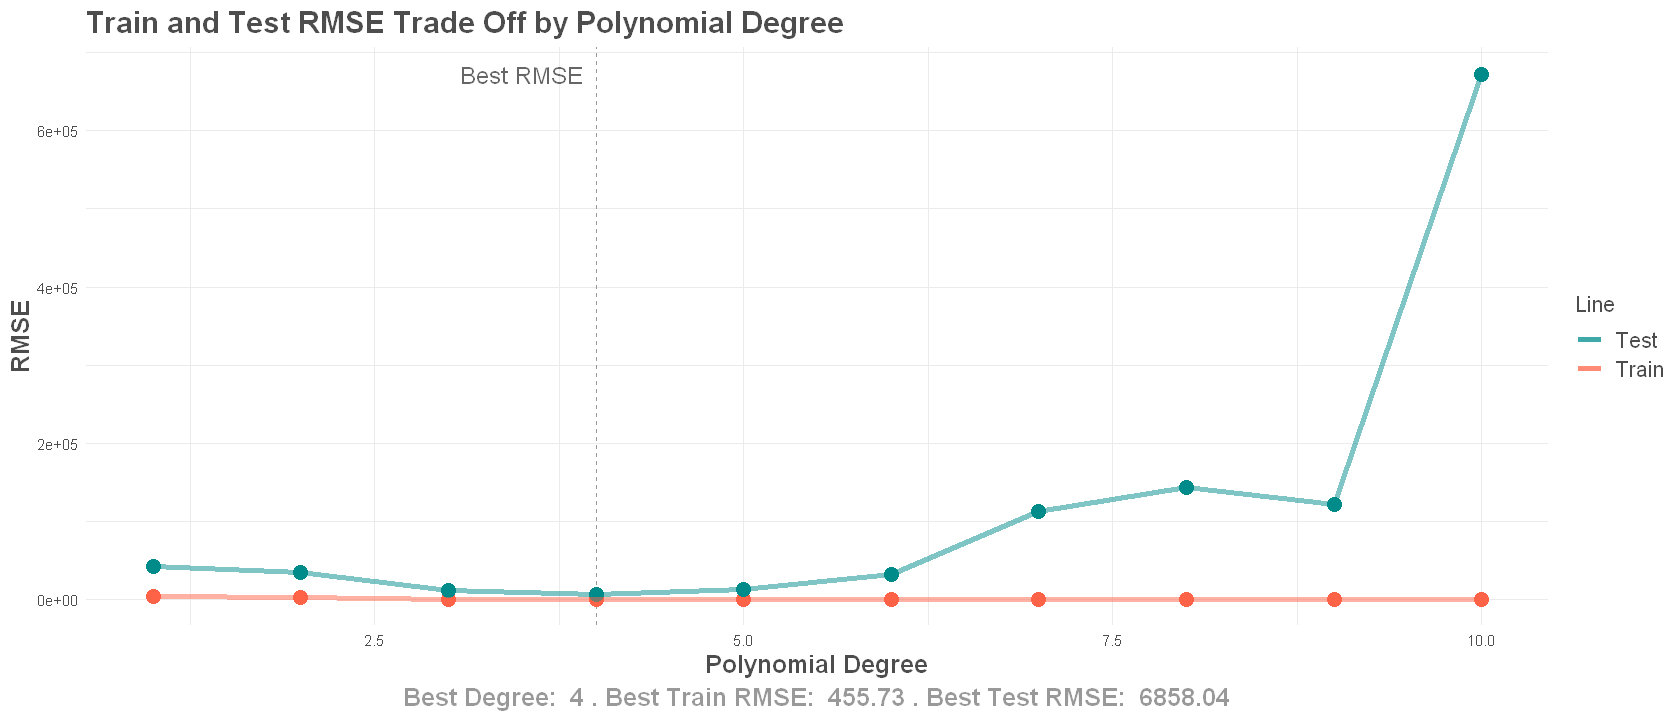

In [51]:
ggplot(trade_off,aes(x = degree)) +
geom_vline(xintercept = best_degree, linetype="dashed", color="gray60") +
  geom_point(aes(y = train_rmse), color = "tomato1", size = 4) +
  geom_point(aes(y = test_rmse), color = "cyan4", size = 4) +
  geom_line(aes(y = train_rmse, color = "tomato1"), size = 1.5, alpha = .5) +
  geom_line(aes(y = test_rmse, color = "cyan4"), size = 1.5, alpha = .5) +
  annotate(
    "text",
    x = best_degree - .5,
    y = max(c(trade_off$train_rmse,trade_off$test_rmse)),
    label = "Best RMSE",
    size = 5,
    color = "gray40"
  ) +
  labs(
    title = "Train and Test RMSE Trade Off by Polynomial Degree",
    x = "Polynomial Degree",
    y = "RMSE",
    caption = paste(
        "Best Degree: ",
        best_degree,
        ". Best Train RMSE: ", 
        best_train_rmse,
        ". Best Test RMSE: ",
        best_test_rmse
    )
  ) +
  scale_color_identity(
    name = "Line",
    breaks = c("cyan4", "tomato1","gray60"),
    labels = c("Test", "Train", "Best"),
    guide = "legend"
  ) +
  theme(plot.caption = element_text(hjust = .5))

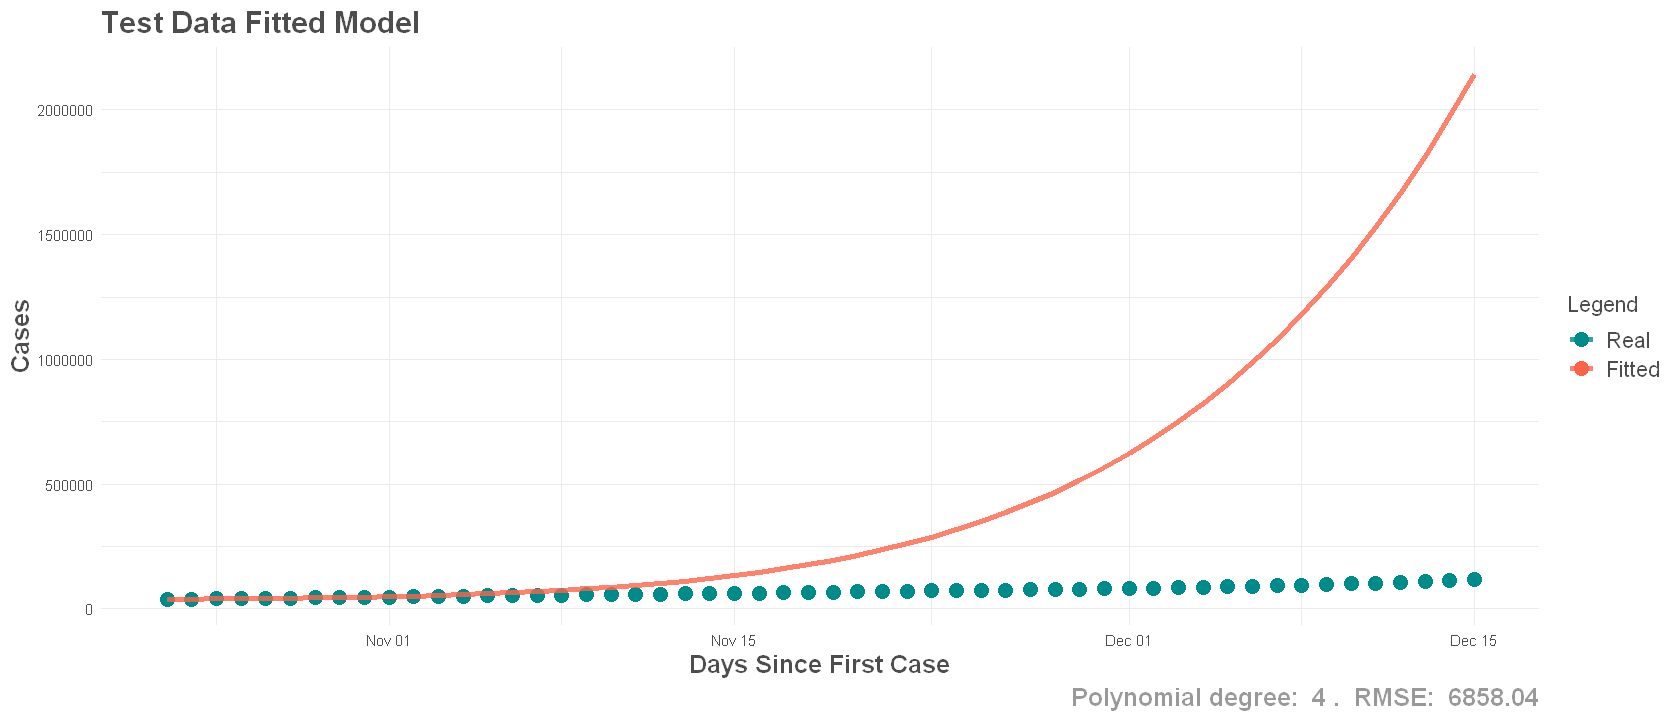

In [53]:
testing_set["pred"] = predict(polynomial_model, testing_set)

ggplot(testing_set, aes(x = date)) +
  geom_point(aes(y = total_cases, color = "cyan4"), size = 4) +
  geom_line(aes(y = pred, color = "tomato1"), size = 1.5, alpha = .8) +
  labs(
    title = "Test Data Fitted Model",
    x = "Days Since First Case",
    y = "Cases",
    caption = paste("Polynomial degree: ", best_degree,"."," RMSE: ",best_test_rmse)
  ) +
  scale_color_identity(
    name = "Legend",
    breaks = c("cyan4", "tomato1"),
    labels = c("Real", "Fitted"),
    guide = "legend"
  )

In [54]:
polynomial_model <- lm(total_cases ~ poly(day, best_degree, raw = TRUE), denmark_covid_data)
max_date <- max(denmark_covid_data$date)

new_data <- tibble(
  date = seq(as.Date(max_date+1), by="day", length = 14),
  day = seq(max(denmark_covid_data$day)+1, max(denmark_covid_data$day)+14, by=1),
  total_cases = c(0)
)

covid_final <- select(denmark_covid_data, date, day, total_cases)
covid_final["predicted"] <- predict(polynomial_model, covid_final)
new_data["predicted"] <- predict(polynomial_model, new_data)

rmse <- round(rmse_vec(covid_final$total_cases, covid_final$predicted), 3)
r2 <- round(rsq_vec(covid_final$total_cases, covid_final$predicted)*100, 3)
mae <- round(mae_vec(covid_final$total_cases, covid_final$predicted), 3)

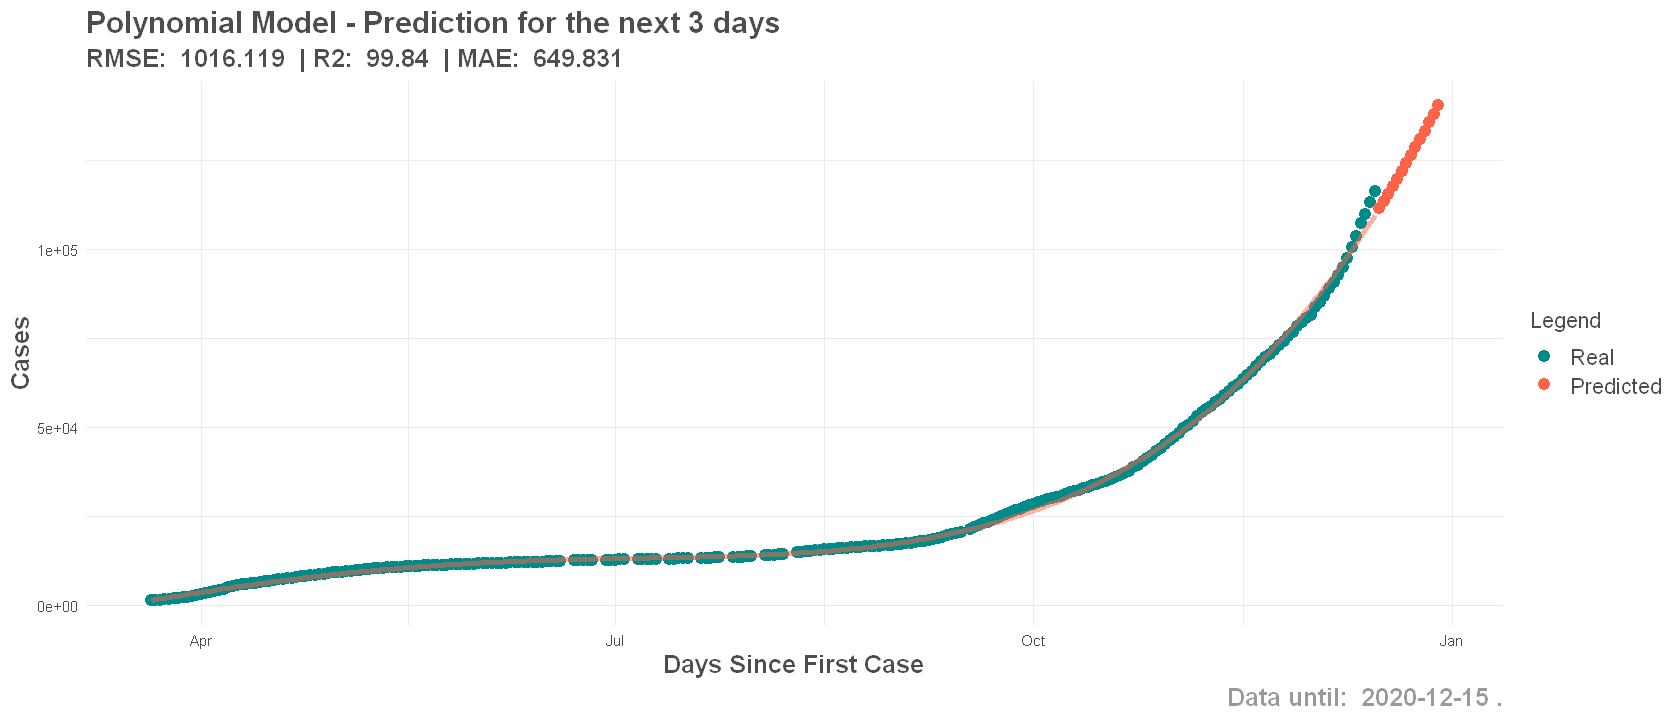

In [56]:
ggplot() +
  geom_point(data = covid_final, aes(x = date, y = total_cases, color="cyan4"), size = 3) +
  geom_point(data = new_data, aes(x = date, y = predicted, color="tomato1"), size = 3) +
  geom_line(data = covid_final, aes(x = date, y = predicted), size = 1.5, alpha = .5, color="tomato1") +
  labs(
    title = "Polynomial Model - Prediction for the next 3 days",
    subtitle = paste("RMSE: ",rmse," | R2: ",r2, " | MAE: ",mae),
    x = "Days Since First Case",
    y = "Cases",
    caption = paste("Data until: ", max_date,".")
  ) +
  scale_color_identity(
    name = "Legend",
    breaks = c("cyan4", "tomato1"),
    labels = c("Real", "Predicted"),
    guide = "legend"
  )

In [57]:
print("Fitted Model, last 30 days")
select(covid_final, date, day, total_cases, predicted) %>% mutate(difference = total_cases - predicted) %>% tail(30)
print("Next 2 weeks prediction")
new_data

[1] "Fitted Model, last 30 days"


,date,day,total_cases,predicted,difference
241,2020-11-16,240,63331,63438.96,-107.9601
242,2020-11-17,241,64551,64675.41,-124.4106
243,2020-11-18,242,65808,65934.31,-126.3148
244,2020-11-19,243,67105,67215.93,-110.9328
245,2020-11-20,244,68362,68520.53,-158.5256
246,2020-11-21,245,69635,69848.36,-213.3559
247,2020-11-22,246,70485,71199.69,-714.6876
248,2020-11-23,247,71654,72574.79,-920.7860
249,2020-11-24,248,73021,73973.92,-952.9176
250,2020-11-25,249,74204,75397.35,-1193.3505


[1] "Next 2 weeks prediction"


date,day,total_cases,predicted
2020-12-16,270,0,111392.0
2020-12-17,271,0,113420.6
2020-12-18,272,0,115480.0
2020-12-19,273,0,117570.6
2020-12-20,274,0,119692.6
2020-12-21,275,0,121846.4
2020-12-22,276,0,124032.2
2020-12-23,277,0,126250.3
2020-12-24,278,0,128501.1
2020-12-25,279,0,130784.9


In [58]:
tail(denmark_covid_data)

,original_date,total_cases,total_recovered,total_tested,total_deaths,daily_deaths,daily_hospitalized,daily_patients_icu,daily_patients_ventilators,date,day,new_cases
265,M12D10,100489,75664,3592677,928,6,342,40,28,2020-12-10,264,3132
266,M12D11,103564,76927,3611456,935,7,361,48,27,2020-12-11,265,3075
267,M12D12,107116,78236,3630815,943,8,371,54,31,2020-12-12,266,3552
268,M12D13,109758,79394,3646152,954,11,390,58,33,2020-12-13,267,2642
269,M12D14,113095,80564,3664247,961,7,429,61,34,2020-12-14,268,3337
270,M12D15,116087,82099,3680607,961,0,439,68,39,2020-12-15,269,2992


-----

-----

### 4.3 Correlation

Pearson correlation coefficient analyzes the realtionship between two variables, draws a line through them and determines whether the relationship is strong or weak and positive or negative. When the data is passed through the formula, the returned value is between -1 an 1, where calue closer to -1 means strong negative relationship and vice-versa.

Pearson correlation coefficient is defined in statistics as the measurement of the strength of the relationship between two variables and their association with each other (**cite**). The formula for Pearson correlation coefficient is:
\begin{equation}
r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}
\end{equation}


One of the popular arguments for increase in number of confirmed COVID-19 cases is the increase in testing. More testing results in more cases. If the testing was stopped, the number of cases would not rise. Pearson correlation coefficient is the perfect use case to confirm the validity of this argument.

To determine the relationship between increasing cases and the increase in testing, we can visualize the data using a scatter plot. The dependent variable, denoted by the Y-axis, in this case will be the total number of confirmed cases and the independent variable, denoted by X-axis, will be the total number of tests conducted.

In [ ]:
str(denmark_covid_data)

In [ ]:
ggplot(denmark_covid_data, aes(x=date, y=daily_cases)) +
geom_point(size=2, shape=4) +
geom_smooth(method = "lm") +
# scale_x_continuous("\nNo. of people tested",                            # Label for y-axis
#                    labels = function(x) format(x, scientific = FALSE)   # Change from exponentials to human readable numbers
#                    ) +
scale_y_continuous("No. of confirmed cases\n") +
ggtitle("Correlation between total cases and total tested")                          # Title for the plot
# single_plot_theme_config


# Calculating the Correlation Coefficient
cor.test(denmark_covid_data$daily_cases,
         denmark_covid_data$date, 
                    method = "pearson")


The scatter plot confirms that the relation between the 2 variables, confirmed cases and total people tested, has a positive, strong and non-linear relationship. The relationship is positive becuase of the nature of the linear line (blue in color) slanting upwards, from left to right. Since the plots do not follow the shape or form of the liner line, the relationship's form is non-linear. Finally, the variables have a strong relationship becuase they are follow a certain curve and are in compact alignment, meaning they are not scattered all over the chart.

Also, the output of Pearson Correlation Coefficient is `0.96` which illustrates the same conclusion as the scatter plot, which is calculcated just above the plot. Since `0.96` is greater than 0, the realtionship is positive and closer to the maximum possible output of 1, concluding the strong relationship.

## 5. Prediction

*This is a work in progress*

## 6. Conclusion of EDA
*This is a work in progress*

In [ ]:
prettyNum(c(1000000, 20000),big.mark=",",scientific=FALSE)